In [15]:
import pandas as pd

df = pd.read_csv("final_imputed_dataset1.csv")

In [16]:
df.isnull().sum()

Unnamed: 0       0
GVKEY            0
datadate         0
fyear            0
indfmt           0
consol           0
popsrc           0
datafmt          0
conm             0
curcd            0
aco              0
act              0
aqc              0
at               0
capx             0
ceq              0
ebit             0
icapt            0
lct              0
ni               0
revt             0
seq              0
xrd           2322
xrdp          2339
costat           0
sic              0
dtype: int64

In [17]:
# Calculate y = capx/at
df['y'] = df['capx'] / df['at']

# Calculate liquidity = act/lct
df['liquidity'] = df['act'] / df['lct']

# Calculate leverage = lct/ceq
df['leverage'] = df['lct'] / df['ceq']

# Assign size = at
df['size'] = df['at']

# Calculate roa = ni/at
df['roa'] = df['ni'] / df['at']

df['prev_inv'] = df['y'].shift(-1)

df['prev_year_at'] = df['at'].shift(1)

# Calculate the growth rate
df['asset_growth'] = df['at'] / df['prev_year_at']

# Drop the 'prev_year_at' column if not needed anymore
df.drop(columns=['prev_year_at'], inplace=True)


In [18]:
df.isnull().sum()

Unnamed: 0         0
GVKEY              0
datadate           0
fyear              0
indfmt             0
consol             0
popsrc             0
datafmt            0
conm               0
curcd              0
aco                0
act                0
aqc                0
at                 0
capx               0
ceq                0
ebit               0
icapt              0
lct                0
ni                 0
revt               0
seq                0
xrd             2322
xrdp            2339
costat             0
sic                0
y                  0
liquidity          0
leverage           0
size               0
roa                0
prev_inv           1
asset_growth       1
dtype: int64

In [19]:
df = df[(df['fyear'] >= 2000) & (df['fyear'] <= 2021)]

In [20]:
df.isnull().sum()

Unnamed: 0         0
GVKEY              0
datadate           0
fyear              0
indfmt             0
consol             0
popsrc             0
datafmt            0
conm               0
curcd              0
aco                0
act                0
aqc                0
at                 0
capx               0
ceq                0
ebit               0
icapt              0
lct                0
ni                 0
revt               0
seq                0
xrd             2128
xrdp            2141
costat             0
sic                0
y                  0
liquidity          0
leverage           0
size               0
roa                0
prev_inv           0
asset_growth       0
dtype: int64

In [21]:
# adding cpu 
# Assuming df_cpu1 is your DataFrame containing the dataset
df_cpu1 = pd.read_csv('CPU index.csv')
# Convert 'date' column to datetime format with custom date parser
df_cpu1['date'] = pd.to_datetime(df_cpu1['date'], format='%b-%y')

# Extract year from 'date' column
df_cpu1['year'] = df_cpu1['date'].dt.year

# Drop the 'old_cpu_index' column
df_cpu1.drop(columns='old_cpu_index', inplace=True)

# Group by year and compute average cpu_index
average_cpu_index = df_cpu1.groupby('year')['cpu_index'].mean().reset_index()

# Verify the result
print(average_cpu_index)

    year   cpu_index
0   1987   59.666897
1   1988   65.722413
2   1989   76.697151
3   1990   94.779705
4   1991   80.746618
5   1992   88.297105
6   1993   78.883753
7   1994   70.176454
8   1995   83.972636
9   1996   66.936481
10  1997   60.388895
11  1998   57.564906
12  1999   58.748100
13  2000   62.448747
14  2001   93.647460
15  2002   88.280674
16  2003   67.846581
17  2004   65.208485
18  2005   66.038375
19  2006   67.521463
20  2007  107.765643
21  2008   97.135520
22  2009   99.128977
23  2010  112.572259
24  2011  114.578606
25  2012  100.094996
26  2013   77.565805
27  2014   83.167437
28  2015   92.614515
29  2016  120.715749
30  2017  169.765549
31  2018  143.290591
32  2019  192.001778
33  2020  218.634176
34  2021  215.384017
35  2022  225.413245
36  2023  221.172666


In [22]:
combined_data = pd.merge(df, average_cpu_index, left_on='fyear', right_on='year', how='inner')

In [23]:
combined_data.shape

(6072, 35)

In [24]:
combined_data["GVKEY"].value_counts()

GVKEY
1075      22
12540     22
14225     22
13824     22
13714     22
          ..
6730      22
6733      22
6774      22
6829      22
126721    22
Name: count, Length: 276, dtype: int64

In [25]:
X = combined_data[['leverage', 'roa', 'icapt', 'aqc', 'prev_inv', 'cpu_index', 'asset_growth', 'sic']]
y = combined_data['y']

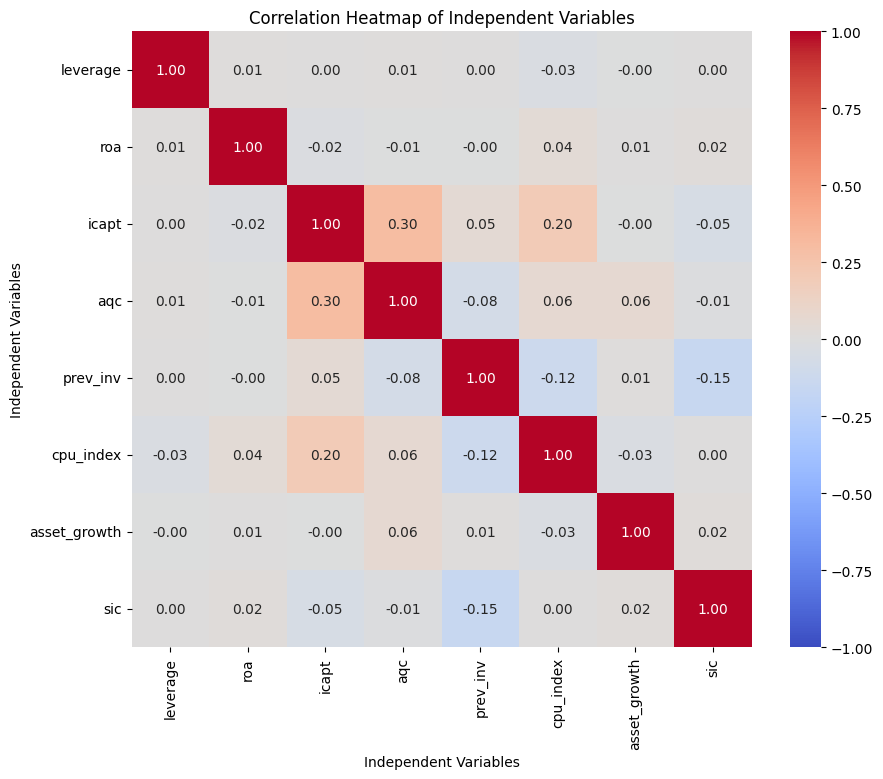

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = X.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Independent Variables')
plt.xlabel('Independent Variables')
plt.ylabel('Independent Variables')
plt.show()


In [27]:
combined_data['sic'].unique()

array([4911, 3845, 3674, 2810, 9997, 1311, 3823, 2836, 3663, 3559, 2070,
       7370, 7374, 2670, 3411, 3841, 4812, 5731, 3826, 3721, 7363, 2834,
       2085, 4011, 2030, 2082, 5122, 3531, 2911, 2840, 7200, 2842, 2086,
       2844, 4841, 2000, 4931, 3851, 3679, 3510, 5331, 4888, 3585, 2820,
       7311, 4924, 7323, 4923, 4731, 2870, 4513, 2040, 5013, 5000, 1389,
       3812, 3944, 2060, 3570, 5211, 2011, 3640, 4213, 3560, 2860, 2631,
       3827, 2621, 5411, 5990, 3760, 3430, 2090, 5812, 8000, 1040, 3021,
       3569, 4932, 3312, 2851, 3490, 8721, 3561, 2080, 2111, 3620, 7340,
       5651, 3630, 2033, 3420, 4512, 3540, 5140, 3825, 7373, 4210, 3724,
       8062, 2300, 1400, 5912, 3060, 3572, 4922, 7372, 8700, 4400, 3843,
       4833, 3678, 7990, 4953, 1000, 8071, 3576, 3844, 3829, 5531, 2835,
       4991, 3577, 2273, 3672, 3714, 7011, 5399, 2800, 5200, 2650, 5010,
       3743, 5090, 8090, 5047, 5500, 5961, 1731, 4700], dtype=int64)

In [28]:
df_sic= pd.read_csv('sic_codes.csv')

In [29]:
df_sic.head()

,SIC Code,Office,Industry Title
0,100,Industrial Applications and Services,AGRICULTURAL PRODUCTION-CROPS
1,200,Industrial Applications and Services,AGRICULTURAL PROD-LIVESTOCK & ANIMAL SPECIALTIES
2,700,Industrial Applications and Services,AGRICULTURAL SERVICES
3,800,Industrial Applications and Services,FORESTRY
4,900,Industrial Applications and Services,"FISHING, HUNTING AND TRAPPING"


In [30]:
# Rename the 'SIC Code' column to 'sic' in df_sic
df_sic.rename(columns={'SIC Code': 'sic'}, inplace=True)

In [31]:
combined_data.shape

(6072, 35)

In [32]:
# Merge the two DataFrames based on 'SIC Code'
merged_data = pd.merge(combined_data, df_sic, on='sic', how='left')

In [33]:
# Filter the DataFrame where 'Office' or 'Industry Title' is null
null_values = merged_data[(merged_data['Office'].isnull()) | (merged_data['Industry Title'].isnull())]

# Get the unique SIC codes with null values
sic_with_null_values = null_values['sic'].unique()

print("SIC codes with null values for Office or Industry Title:")
print(sic_with_null_values)


SIC codes with null values for Office or Industry Title:
[9997 2085 4888 7323 8721]


In [34]:
import pandas as pd

# Define mappings for SIC codes to Office and Industry titles
sic_mappings = {
    9997: {'Office': 'Nonprofit Organizations', 'Industry Title': 'Nonprofit Organizations'},
    2085: {'Office': 'Industrial Applications and Services', 'Industry Title': 'Distilled and Blended Liquors Manufacturing'},
    4888: {'Office': 'Industrial Applications and Services', 'Industry Title': 'Water Transportation of Freight, Except Inland'},
    7323: {'Office': 'Industrial Applications and Services', 'Industry Title': 'Credit Reporting Services'},
    8721: {'Office': 'Industrial Applications and Services', 'Industry Title': 'Accounting, Auditing, and Bookkeeping Services'}
}

# Impute the Office and Industry titles for the given SIC codes in merged_df
for sic_code, titles in sic_mappings.items():
    merged_data.loc[merged_data['sic'] == sic_code, ['Office', 'Industry Title']] = titles['Office'], titles['Industry Title']


In [88]:
merged_data.head()

,Unnamed: 0,GVKEY,datadate,fyear,indfmt,consol,popsrc,datafmt,conm,curcd,...,liquidity,leverage,size,roa,prev_inv,asset_growth,year,cpu_index,Office,Industry Title
0,27,1075,31/12/2000,2000,INDL,C,D,STD,PINNACLE WEST CAPITAL CORP,USD,...,0.666427,0.499975,7149.151,0.042289,0.130371,1.081810,2000,62.448747,Office of Energy & Transportation,ELECTRIC SERVICES
1,52,1078,31/12/2000,2000,INDL,C,D,STD,ABBOTT LABORATORIES,USD,...,1.716387,0.501410,15283.254,0.182290,0.059633,1.056127,2000,62.448747,Industrial Applications and Services,ELECTROMEDICAL & ELECTROTHERAPEUTIC APPARATUS
2,78,1161,31/12/2000,2000,INDL,C,D,STD,ADVANCED MICRO DEVICES,USD,...,2.171121,0.385951,5767.735,0.170435,0.120212,1.317527,2000,62.448747,Office of Manufacturing,SEMICONDUCTORS & RELATED DEVICES
3,104,1209,30/09/2000,2000,INDL,C,D,STD,AIR PRODUCTS & CHEMICALS INC,USD,...,1.312918,0.487293,8270.500,0.015017,0.087616,1.004250,2000,62.448747,Industrial Applications and Services,INDUSTRIAL INORGANIC CHEMICALS
4,130,1300,31/12/2000,2000,INDL,C,D,STD,HONEYWELL INTERNATIONAL INC,USD,...,1.477821,0.743175,25175.000,0.065899,0.036159,1.070047,2000,62.448747,Nonprofit Organizations,Nonprofit Organizations


In [35]:
import pandas as pd

# Set maximum number of rows to display
pd.set_option('display.max_rows', None)

# Get value counts for each industry title
industry_counts = merged_data['Industry Title'].value_counts()

# Print industry counts
print(industry_counts)


Industry Title
ELECTRIC & OTHER SERVICES COMBINED                              308
SERVICES-COMPUTER PROGRAMMING, DATA PROCESSING, ETC.            264
ELECTRIC SERVICES                                               220
SEMICONDUCTORS & RELATED DEVICES                                220
SERVICES-PREPACKAGED SOFTWARE                                   198
CRUDE PETROLEUM & NATURAL GAS                                   198
PHARMACEUTICAL PREPARATIONS                                     176
LABORATORY ANALYTICAL INSTRUMENTS                               132
BIOLOGICAL PRODUCTS, (NO DISGNOSTIC SUBSTANCES)                 110
SURGICAL & MEDICAL INSTRUMENTS & APPARATUS                      110
SERVICES-COMPUTER INTEGRATED SYSTEMS DESIGN                      88
RETAIL-EATING PLACES                                             88
ELECTROMEDICAL & ELECTROTHERAPEUTIC APPARATUS                    88
INDUSTRIAL INORGANIC CHEMICALS                                   66
RAILROADS, LINE-HAUL OPERATING   

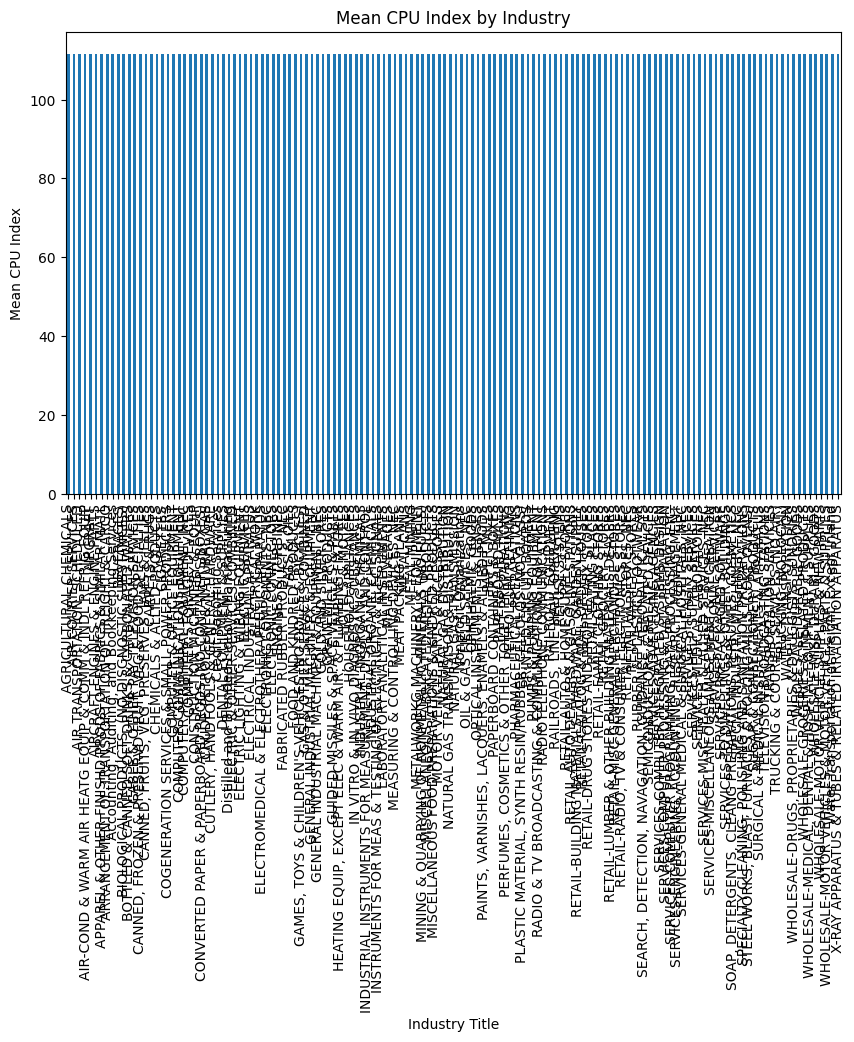

In [36]:
import matplotlib.pyplot as plt

# Group by industry title and calculate mean cpu_index
industry_cpu_index = merged_data.groupby('Industry Title')['cpu_index'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
industry_cpu_index.plot(kind='bar')
plt.title('Mean CPU Index by Industry')
plt.xlabel('Industry Title')
plt.ylabel('Mean CPU Index')
plt.xticks(rotation=90)
plt.show()


In [37]:
X = merged_data[['leverage', 'roa', 'icapt', 'aqc', 'prev_inv', 'cpu_index', 'asset_growth', 'sic']]
y = merged_data['y']

In [38]:
import numpy as np
X = X.applymap(lambda x: np.log(x) if x > 0 else x)
y = np.log(combined_data['y'])

In [39]:
# X

In [40]:
X.isnull().sum()

leverage        0
roa             0
icapt           0
aqc             0
prev_inv        0
cpu_index       0
asset_growth    0
sic             0
dtype: int64

In [41]:
X.shape

(6072, 8)

In [42]:
import statsmodels.api as sm

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     3363.
Date:                Tue, 05 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:10:46   Log-Likelihood:                -2182.5
No. Observations:                6072   AIC:                             4383.
Df Residuals:                    6063   BIC:                             4443.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1732      0.100      1.739   

**t-values**:
   - t-values represent the ratio of the estimated coefficient to its standard error.
   - They indicate the significance of the estimated coefficient.
   - Larger absolute t-values (in either direction) suggest greater evidence against the null hypothesis that the coefficient is zero.
   
**P-values (P>|t|)**:
   - P-values represent the probability of observing the estimated coefficient (or more extreme) if the null hypothesis (that the coefficient is zero) is true.
   - Small p-values (typically less than a chosen significance level, such as 0.05) suggest that the coefficient is statistically significant.
   - In this output, all p-values are very close to zero (0.000), indicating that all coefficients are statistically significant at conventional significance levels (e.g., 0.05).
   
**Confidence Intervals ([0.025 0.975])**:
   - Confidence intervals provide a range of plausible values for the true population parameter (the coefficient) based on the sample data.
   - They are typically constructed around the estimated coefficient and provide a sense of the precision of the estimate.
   - The confidence interval is calculated as the estimated coefficient plus or minus a margin of error.
   - In this output, the confidence intervals indicate the range within which we are reasonably confident the true coefficients lie.

**R-squared (or Adjusted R-squared) Test:**
R-squared measures the proportion of variance in the dependent variable that is explained by the independent variables in the model.
Adjusted R-squared adjusts for the number of independent variables in the model, providing a more conservative measure of model fit.
Both R-squared and Adjusted R-squared range from 0 to 1, with higher values indicating better fit.

In [43]:
# Calculate R-squared
r_squared = model.rsquared
print("R-squared:", r_squared)

# Calculate Adjusted R-squared
adjusted_r_squared = model.rsquared_adj
print("Adjusted R-squared:", adjusted_r_squared)


R-squared: 0.8161100628143495
Adjusted R-squared: 0.81586742393962


The F-test assesses the overall significance of the model by comparing the explained variance to the unexplained variance.
A significant F-test indicates that at least one independent variable has a nonzero coefficient, suggesting that the model as a whole is significant.

In [44]:
# Get F-statistic and associated p-value
f_statistic = model.fvalue
p_value = model.f_pvalue

print("F-statistic:", f_statistic)
print("p-value:", p_value)


F-statistic: 3363.476127739357
p-value: 0.0


In [45]:
# Group by Industry Title and calculate the mean CPU index for each industry
industry_cpu_index = merged_data.groupby('Industry Title')['cpu_index'].mean()

# Print the numerical breakdown
print(industry_cpu_index)


Industry Title
AGRICULTURAL CHEMICALS                                          111.609427
AIR COURIER SERVICES                                            111.609427
AIR TRANSPORTATION, SCHEDULED                                   111.609427
AIR-COND & WARM AIR HEATG EQUIP & COMM & INDL REFRIG EQUIP      111.609427
AIRCRAFT                                                        111.609427
AIRCRAFT ENGINES & ENGINE PARTS                                 111.609427
APPAREL & OTHER FINISHD PRODS OF FABRICS & SIMILAR MATL         111.609427
ARRANGEMENT OF TRANSPORTATION OF FREIGHT & CARGO                111.609427
Accounting, Auditing, and Bookkeeping Services                  111.609427
BEVERAGES                                                       111.609427
BIOLOGICAL PRODUCTS, (NO DISGNOSTIC SUBSTANCES)                 111.609427
BOTTLED & CANNED SOFT DRINKS & CARBONATED WATERS                111.609427
CABLE & OTHER PAY TELEVISION SERVICES                           111.609427
CANNED, FR

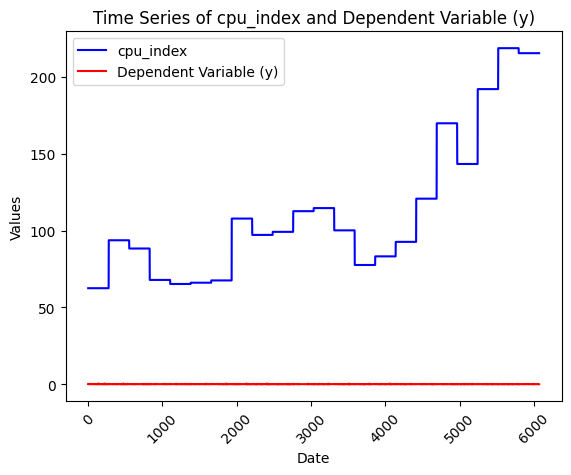

In [46]:
import matplotlib.pyplot as plt

# Assuming combined_data is a DataFrame with a datetime index
plt.plot(combined_data.index, combined_data['cpu_index'], color='blue', label='cpu_index')
plt.plot(combined_data.index, combined_data['y'], color='red', label='Dependent Variable (y)')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time Series of cpu_index and Dependent Variable (y)')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Display the plot
plt.show()



In [47]:
print(combined_data['y'])

0       0.092124
1       0.090899
2       0.139652
3       0.092824
4       0.033883
5       0.162448
6       0.091298
7       0.032503
8       0.034406
9       0.081062
10      0.062302
11      0.296502
12      0.015728
13      0.036342
14      0.029726
15      0.065619
16      0.009852
17      0.073469
18      0.037248
19      0.074201
20      0.083544
21      0.107039
22      0.135901
23      0.048595
24      0.022176
25      0.076200
26      0.033508
27      0.049510
28      0.044556
29      0.038491
30      0.027155
31      0.029986
32      0.048763
33      0.070691
34      0.047900
35      0.084147
36      0.036297
37      0.035183
38      0.050549
39      0.045792
40      0.033961
41      0.058745
42      0.065106
43      0.045464
44      0.226129
45      0.087009
46      0.050667
47      0.021952
48      0.129708
49      0.059153
50      0.044707
51      0.047192
52      0.040453
53      0.048797
54      0.015194
55      0.096844
56      0.031236
57      0.087519
58      0.0456

In [48]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [49]:
df = pd.read_csv('S&PDataset_final.csv')
df.shape

(11553, 26)

In [50]:
row_count_per_gvkey = df['GVKEY'].value_counts()
row_count_per_gvkey

GVKEY
14282     26
13824     26
11506     26
11465     26
11456     26
11399     26
11376     26
11264     26
11259     26
11228     26
11032     26
10983     26
10903     26
10894     26
10867     26
10860     26
64768     26
10793     26
10789     26
11550     26
11554     26
64166     26
12540     26
13714     26
13700     26
13498     26
13421     26
13341     26
13125     26
12635     26
12459     26
11687     26
12441     26
64030     26
12141     26
12138     26
12124     26
11856     26
11811     26
64821     26
10530     26
10519     26
8463      26
64925     26
8762      26
8549      26
8543      26
8539      26
8530      26
8479      26
8455      26
8898      26
65417     26
8358      26
8272      26
8264      26
8253      26
29736     26
8245      26
8823      26
9203      26
10499     26
9899      26
10453     26
10407     26
10247     26
10115     26
10096     26
10035     26
10016     26
9882      26
9225      26
9850      26
9846      26
9783      26
9778      26
9771  

In [51]:
companies_to_drop = row_count_per_gvkey[row_count_per_gvkey < 25].index
companies_to_drop

Index([  3851,  62689,   5568,  28877, 126136, 137131, 126554, 141459, 139665,
       138743,
       ...
        34636,  34443,  35077,  35168,  36190,  36191,  37460,  40614,  43197,
        41818],
      dtype='int64', name='GVKEY', length=137)

In [52]:
df = df[~df['GVKEY'].isin(companies_to_drop)]

In [53]:
df['conm'].nunique()

360

In [54]:
df.isnull().sum()

GVKEY          0
datadate       0
fyear          0
indfmt         0
consol         0
popsrc         0
datafmt        0
conm           0
curcd          0
aco          418
act         1814
aqc          938
at             0
capx         153
ceq            0
dt          1445
ebit           0
icapt          1
lct         1801
ni             0
revt           0
seq            0
xrd         3946
xrdp        3966
costat         0
sic            0
dtype: int64

In [55]:
# Counting total financial companies

rows_with_sic_starting_6 = df[df['sic'].astype(str).str.startswith('6')]
grouped_by_gvkey = rows_with_sic_starting_6.groupby('GVKEY')
unique_gvkeys = grouped_by_gvkey.groups.keys()
len(unique_gvkeys)


69

In [56]:
# # Counting financial companies that have incomplete data

# # filtered_df = df[~df['fyear'].between(1999, 2022)]
# filtered_df_starting_6 = df[df['sic'].astype(str).str.startswith('6')]
# grouped_by_gvkey = filtered_df_starting_6.groupby('GVKEY')
# unique_gvkeys_starting_6 = grouped_by_gvkey.groups.keys()
# len(unique_gvkeys_starting_6)

In [57]:
# Dropping all companies that have incomplete data and financial companies

# df_within_year_range = df[df['fyear'].between(1999, 2022)]
df_no_sic_starting_6 = df[~df['sic'].astype(str).str.startswith('6')]

In [58]:
df_no_sic_starting_6['GVKEY'].nunique()

291

In [59]:
df_no_sic_starting_6['GVKEY'].value_counts()

GVKEY
8543      26
63172     26
10247     26
10407     26
10453     26
10499     26
10519     26
10530     26
10789     26
10793     26
10860     26
10867     26
64030     26
10983     26
11032     26
11228     26
10016     26
11259     26
11264     26
11376     26
11399     26
11456     26
11465     26
11506     26
11550     26
11554     26
63080     26
11811     26
12141     26
12441     26
10115     26
9899      26
12540     26
8530      26
31887     26
8030      26
8068      26
8099      26
8151      26
8247      26
8253      26
8264      26
8272      26
8358      26
8455      26
8463      26
8479      26
8539      26
9882      26
64768     26
8549      26
8762      26
8823      26
9203      26
9225      26
9465      26
9667      26
9771      26
64166     26
9778      26
9846      26
9850      26
12459     26
12635     26
7974      26
28180     26
24800     26
24856     26
24925     26
24975     26
25119     26
25124     26
25279     26
61494     26
25340     26
25434     26
26061 

In [60]:
print("Shape: ", df_no_sic_starting_6.shape)
print("Total remaining companies: ", df_no_sic_starting_6['conm'].nunique())

Shape:  (7523, 26)
Total remaining companies:  291


In [61]:
df_no_sic_starting_6.isnull().sum()

GVKEY          0
datadate       0
fyear          0
indfmt         0
consol         0
popsrc         0
datafmt        0
conm           0
curcd          0
aco            2
act          295
aqc          751
at             0
capx          33
ceq            0
dt           987
ebit           0
icapt          1
lct          282
ni             0
revt           0
seq            0
xrd         2701
xrdp        2720
costat         0
sic            0
dtype: int64

In [62]:
df_no_sic_starting_6['GVKEY'].value_counts()

GVKEY
8543      26
63172     26
10247     26
10407     26
10453     26
10499     26
10519     26
10530     26
10789     26
10793     26
10860     26
10867     26
64030     26
10983     26
11032     26
11228     26
10016     26
11259     26
11264     26
11376     26
11399     26
11456     26
11465     26
11506     26
11550     26
11554     26
63080     26
11811     26
12141     26
12441     26
10115     26
9899      26
12540     26
8530      26
31887     26
8030      26
8068      26
8099      26
8151      26
8247      26
8253      26
8264      26
8272      26
8358      26
8455      26
8463      26
8479      26
8539      26
9882      26
64768     26
8549      26
8762      26
8823      26
9203      26
9225      26
9465      26
9667      26
9771      26
64166     26
9778      26
9846      26
9850      26
12459     26
12635     26
7974      26
28180     26
24800     26
24856     26
24925     26
24975     26
25119     26
25124     26
25279     26
61494     26
25340     26
25434     26
26061 

In [63]:
# Counting the unique companies that have missing values for total current assets and liabilities

grouped_by_gvkey = df_no_sic_starting_6.groupby('GVKEY')

missing_act = grouped_by_gvkey['act'].apply(lambda x: x.isnull().sum())
missing_lct = grouped_by_gvkey['lct'].apply(lambda x: x.isnull().sum())

missing_companies = []

for gvkey, count in missing_act.items():
    if count != 0 and count > 2:
        missing_companies.append(gvkey)
    elif count==1:
        lct_act = gvkey

print(("{total} companies with missing act and lct values: {list}").format(total = len(missing_companies), list = missing_companies))


14 companies with missing act and lct values: [2176, 3835, 4839, 5047, 5073, 6669, 8253, 8823, 10519, 11456, 12459, 12635, 25340, 66065]


In [64]:
grouped_by_gvkey = df_no_sic_starting_6.groupby('GVKEY')

missing_act = grouped_by_gvkey['act'].apply(lambda x: x.isnull().sum())
missing_lct = grouped_by_gvkey['lct'].apply(lambda x: x.isnull().sum())

missing_companies = []

lct_act = None  # Define lct_act outside the loop

for gvkey, count in missing_act.items():
    if count != 0 and count > 2:
        missing_companies.append(gvkey)
    elif count == 1:
        lct_act = gvkey  # Assign gvkey to lct_act

print("Total companies with missing act and lct values:", len(missing_companies))
print("List of companies:", missing_companies)
print("lct_act:", lct_act)  # Print lct_act outside the loop


Total companies with missing act and lct values: 14
List of companies: [2176, 3835, 4839, 5047, 5073, 6669, 8253, 8823, 10519, 11456, 12459, 12635, 25340, 66065]
lct_act: None


In [65]:
print(lct_act)

None


In [66]:
missing_act

GVKEY
1045       0
1075       0
1078       0
1161       0
1209       0
1300       0
1327       0
1380       0
1440       0
1598       0
1602       0
1632       0
1678       0
1690       0
1704       0
1722       0
1878       0
1891       0
1913       0
1988       0
2086       0
2111       0
2136       0
2176      26
2184       0
2220       0
2285       0
2312       0
2403       0
2435       0
2574       0
2663       0
2710       0
2751       0
2817       0
2991       0
3026       0
3062       0
3121       0
3144       0
3170       0
3226       0
3362       0
3413       0
3439       0
3504       0
3505       0
3532       0
3650       0
3735       0
3813       0
3835      26
3897       0
3980       0
4029       0
4058       0
4060       0
4066       0
4093       0
4145       0
4213       0
4321       0
4383       0
4423       0
4430       0
4494       0
4503       0
4510       0
4517       0
4598       0
4839      18
5046       0
5047      22
5071       0
5073      13
5125       0
5256  

In [67]:
missing_companies

[2176,
 3835,
 4839,
 5047,
 5073,
 6669,
 8253,
 8823,
 10519,
 11456,
 12459,
 12635,
 25340,
 66065]

In [68]:
df_no_sic_starting_6['GVKEY'].nunique()

291

In [69]:
# Dropping companies with no act or lct values
df_final = df_no_sic_starting_6[~df_no_sic_starting_6['GVKEY'].isin(missing_companies)]
df_final['GVKEY'].nunique()

277

In [70]:
# Substituing null values for aqcuisitions to 0

df_final['aqc'].fillna(0, inplace=True)

In [71]:
# Dropping 'total debt'

df_final = df_final.drop(columns=['dt'])
df_final.columns

Index(['GVKEY', 'datadate', 'fyear', 'indfmt', 'consol', 'popsrc', 'datafmt',
       'conm', 'curcd', 'aco', 'act', 'aqc', 'at', 'capx', 'ceq', 'ebit',
       'icapt', 'lct', 'ni', 'revt', 'seq', 'xrd', 'xrdp', 'costat', 'sic'],
      dtype='object')

In [72]:
df_final.isnull().sum()

GVKEY          0
datadate       0
fyear          0
indfmt         0
consol         0
popsrc         0
datafmt        0
conm           0
curcd          0
aco            2
act            2
aqc            0
at             0
capx          30
ceq            0
ebit           0
icapt          1
lct            2
ni             0
revt           0
seq            0
xrd         2532
xrdp        2551
costat         0
sic            0
dtype: int64

In [73]:
df_final[df_final['fyear'] == 2023]

,GVKEY,datadate,fyear,indfmt,consol,popsrc,datafmt,conm,curcd,aco,...,ebit,icapt,lct,ni,revt,seq,xrd,xrdp,costat,sic
24,1045,31/12/2023,2023,INDL,C,D,STD,AMERICAN AIRLINES GROUP INC,USD,658.000,...,4013.000,30520.000,22062.000,822.000,52788.000,-5202.000,NaN,NaN,A,4512
75,1078,31/12/2023,2023,INDL,C,D,STD,ABBOTT LABORATORIES,USD,2256.000,...,6793.000,53375.000,13841.000,5723.000,40109.000,38603.000,2741.000,2888.000,A,3845
101,1161,31/12/2023,2023,INDL,C,D,STD,ADVANCED MICRO DEVICES,USD,1259.000,...,629.000,58144.000,6689.000,854.000,22680.000,55892.000,5872.000,5005.000,A,3674
127,1209,30/09/2023,2023,INDL,C,D,STD,AIR PRODUCTS & CHEMICALS INC,USD,436.800,...,2704.400,25722.700,3895.800,2300.200,12600.000,14312.900,105.600,102.900,A,2810
153,1300,31/12/2023,2023,INDL,C,D,STD,HONEYWELL INTERNATIONAL INC,USD,1462.000,...,7084.000,33900.000,18539.000,5658.000,36662.000,15856.000,1456.000,1478.000,A,9997
179,1327,30/09/2023,2023,INDL,C,D,STD,SKYWORKS SOLUTIONS INC,USD,450.900,...,1208.900,7264.300,955.700,982.800,4772.400,6082.700,606.800,617.900,A,3674
205,1380,31/12/2023,2023,INDL,C,D,STD,HESS CORP,USD,108.000,...,2815.000,18519.000,3270.000,1382.000,10511.000,8986.000,NaN,NaN,A,1311
231,1440,31/12/2023,2023,INDL,C,D,STD,AMERICAN ELECTRIC POWER CO,USD,1161.900,...,3683.200,63500.500,11583.600,2208.100,18982.300,25289.200,NaN,NaN,A,4911
335,1598,31/12/2023,2023,INDL,C,D,STD,AMETEK INC,USD,128.635,...,1707.459,10808.059,2882.573,1313.188,6596.950,8730.191,220.800,198.800,A,3823
361,1602,31/12/2023,2023,INDL,C,D,STD,AMGEN INC,USD,1928.000,...,9269.000,70093.000,18392.000,6717.000,28190.000,6232.000,5567.000,4434.000,A,2836


In [74]:
df_final = df_final[df_final['fyear'] != 1998]

In [75]:
df_final = df_final[df_final['fyear'] != 2023]

In [76]:
df_final = df_final[df_final['GVKEY'] != 1045]

In [77]:
df_final['GVKEY'].value_counts()

GVKEY
1075      24
12540     24
14225     24
13824     24
13714     24
13700     24
13498     24
13421     24
12441     24
11465     24
12142     24
12141     24
11811     24
11672     24
11554     24
11550     24
14282     24
14359     24
14418     24
14477     24
14590     24
14934     24
14960     24
15247     24
15267     24
15414     24
15855     24
16478     24
16721     24
18699     24
20548     24
20779     24
20904     24
11506     24
11399     24
1078      24
9777      24
10016     24
9899      24
9882      24
9850      24
9846      24
9778      24
9771      24
11376     24
9667      24
9465      24
9248      24
9225      24
9203      24
8810      24
10115     24
10247     24
10407     24
10453     24
10499     24
10530     24
10789     24
10793     24
10860     24
10867     24
10920     24
10983     24
11032     24
11060     24
11228     24
11259     24
11264     24
22815     24
23809     24
23812     24
61591     24
64630     24
64410     24
64166     24
64030     24
63172 

In [78]:
# df_final.to_csv('final_dataset.csv')

In [79]:
df_final.isnull().sum()

GVKEY          0
datadate       0
fyear          0
indfmt         0
consol         0
popsrc         0
datafmt        0
conm           0
curcd          0
aco            0
act            1
aqc            0
at             0
capx          22
ceq            0
ebit           0
icapt          0
lct            1
ni             0
revt           0
seq            0
xrd         2322
xrdp        2339
costat         0
sic            0
dtype: int64

# Imputation for ACT LCT values

In [80]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Step 1: Filter rows where gvkey is equal to lct_act
df_subset = df_final[df_final['GVKEY'] == lct_act].copy()
df_subset = df_final.drop(columns=['datadate','indfmt','consol','popsrc','datafmt','conm','curcd','costat', 'xrd', 'xrdp', 'capx'])


# Step 2: Split the dataset into two parts
df_missing = df_subset[df_subset[['act', 'lct']].isnull().any(axis=1)]  # Rows with missing values
df_complete = df_subset.dropna(subset=['act', 'lct'])  # Rows with complete data

# Step 3: Train a linear regression model for 'act'
X_act = df_complete.drop(['act', 'lct'], axis=1)  # Features for 'act' (excluding 'lct' and 'act')
y_act = df_complete['act']  # Target variable for 'act'

model_act = LinearRegression()
model_act.fit(X_act, y_act)

# Step 4: Use the trained model to predict missing values for 'act'
X_missing_act = df_missing.drop(['act', 'lct'], axis=1)  # Features from rows with missing values for 'act'
imputed_values_act = model_act.predict(X_missing_act)

# Step 5: Replace missing values in 'act' with predicted values
df_missing['act'] = imputed_values_act

# Step 6: Train a linear regression model for 'lct'
X_lct = df_complete.drop(['act', 'lct'], axis=1)  # Features for 'lct' (excluding 'lct' and 'act')
y_lct = df_complete['lct']  # Target variable for 'lct'

model_lct = LinearRegression()
model_lct.fit(X_lct, y_lct)

# Step 7: Use the trained model to predict missing values for 'lct'
X_missing_lct = df_missing.drop(['act', 'lct'], axis=1)  # Features from rows with missing values for 'lct'
imputed_values_lct = model_lct.predict(X_missing_lct)

# Step 8: Replace missing values in 'lct' with predicted values
df_missing['lct'] = imputed_values_lct

# Update the original DataFrame with imputed values
df_final.update(df_missing)

In [81]:
df_final[df_final['GVKEY'] == lct_act]

,GVKEY,datadate,fyear,indfmt,consol,popsrc,datafmt,conm,curcd,aco,...,ebit,icapt,lct,ni,revt,seq,xrd,xrdp,costat,sic


In [82]:
missing_capx = df_final[df_final['capx'].isnull()].groupby('GVKEY').size()
missing_capx

GVKEY
1078     3
1878     3
3505     3
8247     3
8549     2
14934    1
25313    3
61574    2
66446    2
dtype: int64

# Imputation of capx column

In [83]:
from sklearn.impute import KNNImputer

# Assuming your data is stored in a DataFrame called df

# Select columns with missing values
cols_with_missing = ['capx']

# Initialize KNN imputer with k=5
imputer = KNNImputer(n_neighbors=5)

# Group the DataFrame by 'GVKEY'
grouped = df_final.groupby('GVKEY')

# Impute missing values for each group separately
for name, group in grouped:
    # Impute missing values for the current group
    group[cols_with_missing] = imputer.fit_transform(group[cols_with_missing])
    # Update the imputed values in the main DataFrame
    df_final.loc[group.index, cols_with_missing] = group[cols_with_missing]

# Print the DataFrame to verify the imputed values
print(df_final)

       GVKEY    datadate  fyear indfmt consol popsrc datafmt  \
26      1075  31/12/1999   1999   INDL      C      D     STD   
27      1075  31/12/2000   2000   INDL      C      D     STD   
28      1075  31/12/2001   2001   INDL      C      D     STD   
29      1075  31/12/2002   2002   INDL      C      D     STD   
30      1075  31/12/2003   2003   INDL      C      D     STD   
31      1075  31/12/2004   2004   INDL      C      D     STD   
32      1075  31/12/2005   2005   INDL      C      D     STD   
33      1075  31/12/2006   2006   INDL      C      D     STD   
34      1075  31/12/2007   2007   INDL      C      D     STD   
35      1075  31/12/2008   2008   INDL      C      D     STD   
36      1075  31/12/2009   2009   INDL      C      D     STD   
37      1075  31/12/2010   2010   INDL      C      D     STD   
38      1075  31/12/2011   2011   INDL      C      D     STD   
39      1075  31/12/2012   2012   INDL      C      D     STD   
40      1075  31/12/2013   2013   INDL  

In [84]:
df_final.isnull().sum()

GVKEY          0
datadate       0
fyear          0
indfmt         0
consol         0
popsrc         0
datafmt        0
conm           0
curcd          0
aco            0
act            0
aqc            0
at             0
capx           0
ceq            0
ebit           0
icapt          0
lct            0
ni             0
revt           0
seq            0
xrd         2322
xrdp        2339
costat         0
sic            0
dtype: int64

In [85]:
df_final['GVKEY'].value_counts()

GVKEY
1075      24
12540     24
14225     24
13824     24
13714     24
13700     24
13498     24
13421     24
12441     24
11465     24
12142     24
12141     24
11811     24
11672     24
11554     24
11550     24
14282     24
14359     24
14418     24
14477     24
14590     24
14934     24
14960     24
15247     24
15267     24
15414     24
15855     24
16478     24
16721     24
18699     24
20548     24
20779     24
20904     24
11506     24
11399     24
1078      24
9777      24
10016     24
9899      24
9882      24
9850      24
9846      24
9778      24
9771      24
11376     24
9667      24
9465      24
9248      24
9225      24
9203      24
8810      24
10115     24
10247     24
10407     24
10453     24
10499     24
10530     24
10789     24
10793     24
10860     24
10867     24
10920     24
10983     24
11032     24
11060     24
11228     24
11259     24
11264     24
22815     24
23809     24
23812     24
61591     24
64630     24
64410     24
64166     24
64030     24
63172 

In [86]:
df_final.to_csv('final_imputed_dataset1.csv')

In [87]:
df_final["GVKEY"].nunique()

276